#### Using the Chicago Crime Dataset(any of the 3 sheets you choose), perfrom the following data preparation steps:
1. Use a funtion to Drop redundant columns (a redundant column is one that gives infromation that another column already explains: eg ID and Case number) 
2. Use functions to create new columns for Months, Day, Season.
3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?
4.  According to location description, where does crime happen the most?
5.  Did the types of crime change as years go by? If yes/no. Let the data show the insight.

In [27]:
# Loading necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [28]:
# Saving the file path of the data in a variable 'location'
location = r'C:\Users\Alu\Documents\Altschool Africa\Data'

In [29]:
# Saving the name of the file in a variable 'filename'
filename = '\chicago2.csv'

In [30]:
# Loading the data
chicago_crime_df = pd.read_csv(location + filename)

In [31]:
# Checking the first 5 rows of the dataset
chicago_crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,53000,4809324,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,71.0,18,1174545.0,1845186.0,2006,02/10/2018 03:50:01 PM,41.730582,-87.636172,"(41.730582057, -87.636172403)"
1,53001,2599849,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,16.0,06,1147850.0,1926182.0,2003,02/28/2018 03:56:25 PM,41.953398,-87.731888,"(41.953397577, -87.73188822)"
2,53002,7495181,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,29.0,08B,NaN,NaN,2009,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,53003,2628412,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,47.0,5.0,06,1158854.0,1923830.0,2003,02/28/2018 03:56:25 PM,41.946725,-87.691501,"(41.946724511, -87.691501175)"
4,53004,8389615,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,17.0,68.0,26,1169905.0,1856761.0,2011,02/04/2016 06:33:39 AM,41.762447,-87.652835,"(41.762447305, -87.652834901)"


In [32]:
# Checking the last 5 rows of the dataset
chicago_crime_df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
995,53995,9619330,HX269158,05/19/2014 06:00:00 PM,088XX S WABASH AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,632,6.0,6.0,44.0,26,1178260.0,1846297.0,2014,02/04/2016 06:33:39 AM,41.733547,-87.622530,"(41.733547403, -87.622529593)"
996,53996,11053559,JA390202,08/11/2017 04:00:00 PM,137XX S JEFFERY AVE,0610,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,434,4.0,10.0,55.0,05,1191658.0,1814171.0,2017,02/10/2018 03:50:01 PM,41.645076,-87.574483,"(41.645075822, -87.574483491)"
997,53997,12023154,JD201316,03/21/2020 09:00:00 AM,058XX N WHIPPLE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,2011,20.0,40.0,2.0,11,1154971.0,1938707.0,2020,04/08/2020 03:49:33 PM,41.987627,-87.705373,"(41.987626778, -87.705373183)"
998,53998,1604980,G367198,06/23/2001 05:00:00 PM,070XX S OGLESBY AV,0820,THEFT,$500 AND UNDER,STREET,False,False,331,3.0,NaN,NaN,06,1192939.0,1858982.0,2001,08/17/2015 03:03:40 PM,41.768011,-87.568341,"(41.768010848, -87.568340708)"
999,53999,2660948,HJ275409,04/01/2003 10:00:00 AM,030XX S THROOP ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,923,9.0,11.0,60.0,05,1170351.0,1884713.0,2003,02/10/2018 03:50:01 PM,41.839141,-87.650386,"(41.839140939, -87.650386262)"


In [33]:
# Checking general information of the dataset
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Case Number           1000 non-null   object 
 3   Date                  1000 non-null   object 
 4   Block                 1000 non-null   object 
 5   IUCR                  1000 non-null   object 
 6   Primary Type          1000 non-null   object 
 7   Description           1000 non-null   object 
 8   Location Description  999 non-null    object 
 9   Arrest                1000 non-null   bool   
 10  Domestic              1000 non-null   bool   
 11  Beat                  1000 non-null   int64  
 12  District              1000 non-null   float64
 13  Ward                  929 non-null    float64
 14  Community Area        929 non-null    float64
 15  FBI Code              

In [34]:
# Checking statistical description of the dataset
chicago_crime_df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1000.000000,1.000000e+03,1000.000000,1000.000000,929.000000,929.000000,9.870000e+02,9.870000e+02,1000.000000,987.000000,987.000000
mean,53499.500000,6.936368e+06,1202.313000,11.507000,23.571582,36.550054,1.164625e+06,1.887975e+06,2009.722000,41.848200,-87.671349
std,288.819436,3.362715e+06,711.664699,7.036154,14.293396,21.866363,1.657587e+04,3.184801e+04,5.890961,0.087591,0.060334
min,53000.000000,2.260600e+04,111.000000,1.000000,1.000000,1.000000,1.100317e+06,1.814171e+06,2001.000000,41.645076,-87.906463
25%,53249.750000,3.842856e+06,623.000000,6.000000,11.000000,22.000000,1.153314e+06,1.860908e+06,2005.000000,41.774051,-87.712202
50%,53499.500000,7.032190e+06,1112.500000,11.000000,24.000000,32.000000,1.165973e+06,1.893913e+06,2009.000000,41.864496,-87.665804
75%,53749.250000,9.846722e+06,1733.000000,17.000000,35.000000,55.000000,1.176432e+06,1.911064e+06,2014.000000,41.911833,-87.628321
max,53999.000000,1.277162e+07,2535.000000,25.000000,50.000000,77.000000,1.204890e+06,1.951001e+06,2022.000000,42.021179,-87.525488


In [35]:
# Checking number of rows and columns in our dataset
row, column = chicago_crime_df.shape

print(f'The number columns in the dataset is {column}.\nThe number of rows in the dataset is {row}.')

The number columns in the dataset is 23.
The number of rows in the dataset is 1000.


In [36]:
# Checking the columns in the dataset
print('The columns in this dataset are:')
for columns in chicago_crime_df.columns:
    print(columns)

The columns in this dataset are:
Unnamed: 0
ID
Case Number
Date
Block
IUCR
Primary Type
Description
Location Description
Arrest
Domestic
Beat
District
Ward
Community Area
FBI Code
X Coordinate
Y Coordinate
Year
Updated On
Latitude
Longitude
Location


In [37]:
# Checking the datatype for each of the columns in the dataframe
chicago_crime_df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

#### 1. Use a funtion to Drop redundant columns (a redundant column is one that gives infromation that another column already explains: eg ID and Case number) 

In [38]:
def drop_columns(data, columns):
    """
    Drops specified columns from a DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame from which columns are to be dropped.
    columns (list): The list of column names to be dropped.

    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    data.drop(columns=columns, inplace=True)
    return data


chicago_crime_df= drop_columns(chicago_crime_df, ['Unnamed: 0', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'])

chicago_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On
0,4809324,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,71.0,18,2006,02/10/2018 03:50:01 PM
1,2599849,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,16.0,06,2003,02/28/2018 03:56:25 PM
2,7495181,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,29.0,08B,2009,08/17/2015 03:03:40 PM
3,2628412,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,47.0,5.0,06,2003,02/28/2018 03:56:25 PM
4,8389615,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,17.0,68.0,26,2011,02/04/2016 06:33:39 AM


#### 2. Use functions to create new columns for Months, Day, Season.

In [39]:
# Converting the 'Date' column from an object type to a datetime type
chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'])

# Creating a function that extracts the day and month name from the 'Date' column
def day_month_column(data, column):
    '''
    Extracts and returns the day and month names from a date column in a DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the date column.
    column (str): The name of the date column from which to extract the day and month names.

    Returns:
    tuple: A tuple containing two pandas Series, the first with the day names and the second with the month names.
    '''
    day = data[column].dt.day_name()
    month = data[column].dt.month_name()

    return day, month
# Creating columns 'Day' and 'Month' using the 'day_month_column' function
chicago_crime_df['Day'], chicago_crime_df['Month'] = day_month_column(chicago_crime_df, 'Date')

# Creating function that creates instances for different seasons
def season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Creating column 'Season' using the 'season' function
chicago_crime_df['Season'] = chicago_crime_df.Date.dt.month.apply(season)

chicago_crime_df.head()

C:\Users\Alu\AppData\Local\Temp\ipykernel_8296\1422185103.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'])


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Day,Month,Season
0,4809324,HM300447,2006-04-19 16:45:02,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,71.0,18,2006,02/10/2018 03:50:01 PM,Wednesday,April,Spring
1,2599849,HJ197748,2003-02-21 18:30:00,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,16.0,06,2003,02/28/2018 03:56:25 PM,Friday,February,Winter
2,7495181,HR183541,2009-02-22 19:42:00,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,29.0,08B,2009,08/17/2015 03:03:40 PM,Sunday,February,Winter
3,2628412,HJ231141,2003-03-07 14:46:00,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,47.0,5.0,06,2003,02/28/2018 03:56:25 PM,Friday,March,Spring
4,8389615,HT622350,2011-12-06 00:00:00,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,17.0,68.0,26,2011,02/04/2016 06:33:39 AM,Tuesday,December,Winter


#### 3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?

In [40]:

# Showing the total number of crimes committed on each day in descending order and storing it in a variable 'crimes_each_day'
total_crimes_each_day = chicago_crime_df.groupby(['Day'])['Primary Type'].count().sort_values(ascending=False)
total_crimes_each_day

Day
Monday       169
Wednesday    147
Saturday     143
Sunday       139
Friday       135
Tuesday      134
Thursday     133
Name: Primary Type, dtype: int64

In [41]:
# Showing the total number of the types of crimes that happen each day
total_type_of_crimes_each_day = chicago_crime_df.groupby(['Day']).agg({'Primary Type' : ['value_counts']})
total_type_of_crimes_each_day

Primary Type
                                     value_counts
Day       Primary Type                           
Friday    THEFT                                33
          BATTERY                              21
          DECEPTIVE PRACTICE                   11
          CRIMINAL DAMAGE                      11
          NARCOTICS                            10
...                                           ...
Wednesday ASSAULT                               8
          CRIMINAL DAMAGE                       8
          CRIMINAL TRESPASS                     6
          PROSTITUTION                          2
          OFFENSE INVOLVING CHILDREN            1

[111 rows x 1 columns]

In [42]:
# Showing the total number of crimes committed on each month in descending order and storing it in a variable 'crimes_each_day'
total_crimes_each_month = chicago_crime_df.groupby(['Month'])['Primary Type'].count().sort_values(ascending=False)
total_crimes_each_month

Month
July         96
April        94
October      93
March        90
May          87
September    87
January      79
August       77
December     76
June         76
November     76
February     69
Name: Primary Type, dtype: int64

In [43]:
# Showing the total number of the types of crimes that happen each month
total_type_of_crimes_each_month = chicago_crime_df.groupby(['Month']).agg({'Primary Type' : 'value_counts'})
total_type_of_crimes_each_month

Primary Type
Month     Primary Type                    
April     THEFT                         19
          BATTERY                       16
          CRIMINAL DAMAGE               10
          NARCOTICS                      8
          OTHER OFFENSE                  8
...                                    ...
September DECEPTIVE PRACTICE             1
          INTIMIDATION                   1
          PROSTITUTION                   1
          SEX OFFENSE                    1
          WEAPONS VIOLATION              1

[173 rows x 1 columns]

In [44]:
# Showing the total number of crimes committed on each season in descending order and storing it in a variable 'crimes_each_day'
total_crimes_each_season = chicago_crime_df.groupby(['Season'])['Primary Type'].count().sort_values(ascending=False)
total_crimes_each_season

Season
Spring    271
Autumn    256
Summer    249
Winter    224
Name: Primary Type, dtype: int64

In [45]:
# Showing the total number of the types of crimes that happen each season
total_type_of_crimes_each_season = chicago_crime_df.groupby(['Season']).agg({'Primary Type' : 'value_counts'})
total_type_of_crimes_each_season

Primary Type
Season Primary Type                                  
Autumn THEFT                                       65
       BATTERY                                     48
       CRIMINAL DAMAGE                             26
       NARCOTICS                                   20
       BURGLARY                                    19
...                                               ...
Winter WEAPONS VIOLATION                            2
       STALKING                                     1
       PUBLIC PEACE VIOLATION                       1
       INTERFERENCE WITH PUBLIC OFFICER             1
       INTIMIDATION                                 1

[73 rows x 1 columns]

In [46]:
# Showing the total for each crime in the dataset and storing it in a variable 'frequency_of_crime'
frequency_of_crime = chicago_crime_df['Primary Type'].value_counts()
frequency_of_crime

Primary Type
THEFT                               206
BATTERY                             187
CRIMINAL DAMAGE                     103
NARCOTICS                            93
OTHER OFFENSE                        69
BURGLARY                             62
DECEPTIVE PRACTICE                   54
ASSAULT                              54
MOTOR VEHICLE THEFT                  48
ROBBERY                              44
CRIMINAL TRESPASS                    31
OFFENSE INVOLVING CHILDREN           10
PROSTITUTION                          8
WEAPONS VIOLATION                     8
PUBLIC PEACE VIOLATION                4
INTERFERENCE WITH PUBLIC OFFICER      4
SEX OFFENSE                           4
HOMICIDE                              2
INTIMIDATION                          2
GAMBLING                              2
KIDNAPPING                            2
LIQUOR LAW VIOLATION                  1
STALKING                              1
CRIM SEXUAL ASSAULT                   1
Name: count, dtype: int64

#### Conclusion on question 3:
From the first 2 cells we can see the frequency distribution of crimes in each day. The first cell shows that Monday is the day of the week with the highest crime committed, while the second cell shows that **theft** and **battery** are the crimes that is mosted committed each day of the week.

The third and fourth cells shows the frequency distribution of crimes in each month. The third cell shows that July is the month of the year with the highest crime committed, while the fourth cell shows that **theft** and **battery** are the crimes that is mosted committed each month of year.

The fifth and sixth cells shows the frequency distribution of crimes through each season. The fifth cell shows during spring season more crimes are committed, while the sixth cell shows that **theft** is the most committed crime across each season, closely followed by **battery** only during summer which the highest is **battery** and closely followed by **theft**. 

The seventh cell under question 3 shows the total for each crime committed across the whole data. It shows us that **theft** is the most committed crime with 206 occurrence in this data, followed by **battery** with 187 occurrence, while **Liquor Law Violation**, **Stalking**, and **Crim Sexual Assault** are the least committed crimes each with only 1 occurrence.

#### 4. According to location description, where does crime happen the most?

In [47]:
# Total number of crime committed on a specific location description in dataset
total_crime_committed_location = chicago_crime_df['Location Description'].value_counts()
total_crime_committed_location

Location Description
STREET                                            255
RESIDENCE                                         169
APARTMENT                                         123
SIDEWALK                                           87
OTHER                                              35
                                                 ... 
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA      1
SCHOOL, PUBLIC, GROUNDS                             1
VACANT LOT/LAND                                     1
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA          1
DAY CARE CENTER                                     1
Name: count, Length: 61, dtype: int64

In [48]:
# Showing the location with the highest crime committed in the dataset
print(f'The location with the highest crime rate is {total_crime_committed_location.idxmax()} with {total_crime_committed_location.max()} occurrence.')

The location with the highest crime rate is STREET with 255 occurrence.


In [49]:
chicago_crime_df.groupby(['Location Description'])['Primary Type'].count().sort_values(ascending=False)

Location Description
STREET                                            255
RESIDENCE                                         169
APARTMENT                                         123
SIDEWALK                                           87
OTHER                                              35
                                                 ... 
POOL ROOM                                           1
OTHER RAILROAD PROP / TRAIN DEPOT                   1
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA      1
HIGHWAY/EXPRESSWAY                                  1
ABANDONED BUILDING                                  1
Name: Primary Type, Length: 61, dtype: int64

#### 5. Did the types of crime change as years go by? If yes/no. Let the data show the insight.

In [50]:
# Showing the year for each crime commited and storing it in a variable 'crime_type_by_year'
crime_type_by_year = chicago_crime_df.groupby(['Primary Type', chicago_crime_df['Date'].dt.year])['Case Number'].count()
crime_type_by_year

Primary Type       Date
ASSAULT            2001    2
                   2002    4
                   2003    3
                   2004    4
                   2005    1
                          ..
WEAPONS VIOLATION  2006    1
                   2010    1
                   2019    2
                   2020    1
                   2022    2
Name: Case Number, Length: 260, dtype: int64

In [51]:
# Creating a 'Year' column from the 'Date' column in the dataset
chicago_crime_df['Year'] = chicago_crime_df['Date'].dt.year
# Subsetting 'Primary Type' and 'Year' column and counting the number of values of primary type in each year
crime_type_each_year = chicago_crime_df[['Primary Type', 'Year']].value_counts(ascending=False).reset_index()
display(crime_type_each_year)
# Pivotting the crime_type_each_year data to contain 'Primary Type' as index, 'Year' as columns and 'count' as values
pivot_crime_data = crime_type_each_year.pivot(index='Primary Type', columns='Year', values='count').fillna(0)
pivot_crime_data


,Primary Type,Year,count
0,THEFT,2005,20
1,THEFT,2012,18
2,BATTERY,2004,17
3,THEFT,2004,16
4,BATTERY,2001,16
...,...,...,...
255,MOTOR VEHICLE THEFT,2004,1
256,PUBLIC PEACE VIOLATION,2021,1
257,PUBLIC PEACE VIOLATION,2019,1
258,PUBLIC PEACE VIOLATION,2013,1


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Primary Type,,,,,,,,,,,,,,,,,,,,,,
ASSAULT,2.0,4.0,3.0,4.0,1.0,1.0,4.0,2.0,4.0,1.0,3.0,4.0,3.0,4.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,0.0
BATTERY,16.0,13.0,10.0,17.0,10.0,10.0,10.0,12.0,8.0,7.0,6.0,4.0,6.0,9.0,7.0,8.0,4.0,5.0,10.0,5.0,7.0,3.0
BURGLARY,4.0,3.0,1.0,4.0,3.0,4.0,7.0,4.0,4.0,4.0,3.0,2.0,3.0,4.0,2.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0
CRIM SEXUAL ASSAULT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CRIMINAL DAMAGE,3.0,9.0,8.0,7.0,8.0,2.0,5.0,6.0,5.0,7.0,5.0,3.0,6.0,5.0,3.0,6.0,3.0,1.0,8.0,0.0,3.0,0.0
CRIMINAL TRESPASS,2.0,1.0,3.0,2.0,5.0,2.0,2.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0
DECEPTIVE PRACTICE,1.0,2.0,1.0,0.0,3.0,3.0,1.0,2.0,1.0,4.0,2.0,5.0,0.0,5.0,2.0,6.0,2.0,0.0,1.0,5.0,6.0,2.0
GAMBLING,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HOMICIDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


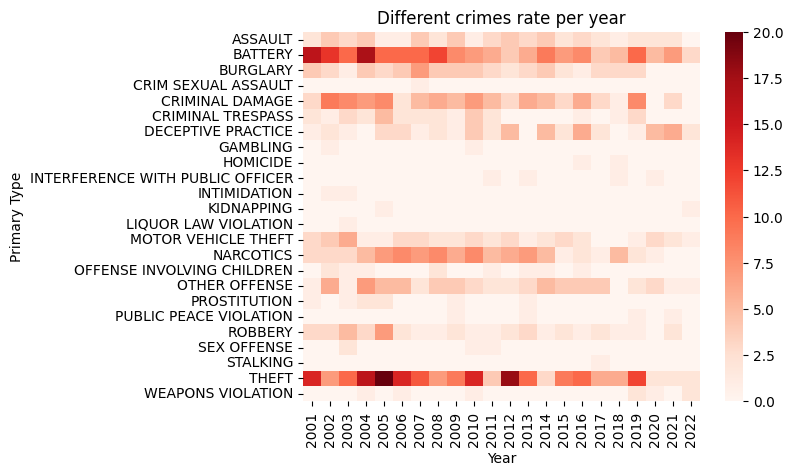

In [52]:
# Plotting a heatmap graph for more insight
ax = sns.heatmap(pivot_crime_data, cmap='Reds')
# Creating a title for the heatmap graph
ax.set_title('Different crimes rate per year')
plt.show()

#### Conclusion on question 5:

The types of crime does not change as years go by. We can see from the heatmap that the crimes committed the highest remains the highest till date. We can even notice a very huge reduction in crime rate generally as the years go by. **Theft** and **Battery** which seem to be the 2 most committed crimes remained the most commited but the also dropped in intensity as the years go by.